### Análise de Componentes Principais

#### Conceitos Básicos

- 1. Matriz de Covariância e suas Propriedades
- 2. Mudança de Base
- 3. Teorema Espectral
- 4. Quociente de Rayleigh

#### Covariância

$cov(x, y) = \dfrac{1}{n} \Sigma_{i}^{} (x_i - \mu_x)(y_i - \mu_y)$

A dispersão da covariância apresenta dois eixos de variância (x: variância de x e y: variância de y)

- Quem apresenta maior variância apresenta menor congruência de dados

Na análise de PCA, a ideia base trata de deslocar o sistema de coordenadas (rotação e/ou translação), de modo a proporcionar a um dos eixos uma variância menor (ou preferencialmente nula).

### Matriz de mudança de base

- Basicamente, monta-se um sistema de bases ortogonais, onde temos o ponto x decomposto em vetores de bases ortogonais entre si (matriz U)

    - $x = \{x_1, ..., x_d\}$ | é um ponto representado na base cartesiana
    - $x = x_1(1, 0, 0, ..., 0) + x_2(0, 1, 0, ..., 0) + ... + x_d(0, 0, 0, ..., 1)$
    - $y = U^{T}x$ | a representação na nova base

### Teorema Espectral

- A matriz simétrica pode ser representada por 3 outras matrizes
    - $A = UDU^{T} -> U^{T}AU = D$
- Para verificar as coordenadas novas, basta fazer
    - $y_i = U^{T}x_i$

### Quociente de Rayleigh

Autovalores: $\lambda_1 >= ... >= \lambda_d$

O Quociente de Rayleigh assegura:

$u_1^{T}XX^{T}u_1 = \lambda_1$ -> u1 (direção de maior variância)

$u_d^{T}XX^{T}u_d = \lambda_d$ -> ud (direção de menor variância)

### Calculando PCA em Python



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_name = 'isolet1234.csv'

In [2]:
df = pd.read_csv(file_name)

In [5]:
df.shape

(6238, 618)

In [6]:
df.iloc[:10, :8]

,c0,c1,c2,c3,c4,c5,c6,c7
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358
5,-0.4634,0.0306,0.3546,0.4448,-0.1022,-0.4184,-0.6388,-0.4370
6,-0.3364,-0.0102,0.2132,0.2018,-0.6146,-0.8380,-0.8130,-0.7240
7,-0.4798,-0.1580,0.1764,0.1820,-0.6378,-0.8400,-0.7280,-0.6654
8,-0.3928,0.0424,0.2166,0.2124,-0.4564,-0.6200,-0.7112,-0.6602
9,-0.5494,-0.0940,0.2868,0.2964,-0.5326,-0.7204,-0.7518,-0.7398


Para poder usufruir dos métodos computacionais de PCA do Python, precisamos converter os dados para um Numpy array, onde temos, na verdade, a extração dos valores do dataframe em questão. Ou seja, removemos os rótulos de índices e rótulos de colunas.

In [13]:
data = df.values

print(data, end='\n\n')
print(type(data))

[[-4.394e-01 -9.300e-02  1.718e-01 ...  5.898e-01 -4.872e-01  1.000e+00]
 [-4.348e-01 -1.198e-01  2.474e-01 ...  4.546e-01 -9.100e-02  1.000e+00]
 [-2.330e-01  2.124e-01  5.014e-01 ...  1.588e-01 -4.762e-01  2.000e+00]
 ...
 [-5.824e-01 -1.646e-01  1.406e-01 ...  5.170e-01  3.430e-01  2.400e+01]
 [ 1.600e-02  8.168e-01  1.000e+00 ... -1.954e-01 -8.620e-01  2.500e+01]
 [-6.116e-01 -1.040e-01  2.566e-01 ...  7.140e-02 -8.920e-02  2.600e+01]]

<class 'numpy.ndarray'>


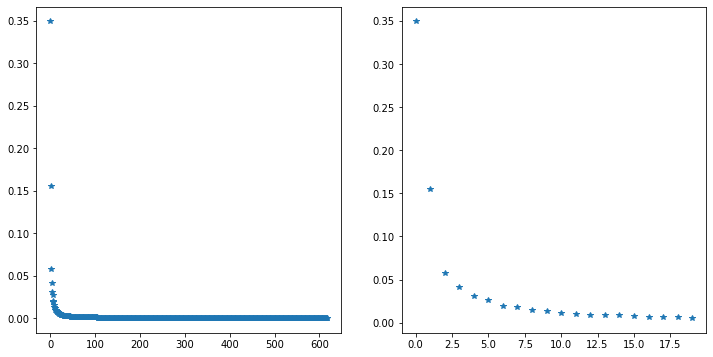

In [14]:
from sklearn.decomposition import PCA

data_pca = PCA(svd_solver='full')
data_transformed = data_pca.fit(data)

plt.rcParams['figure.figsize'] = [12, 6]
f, (ax1, ax2)  = plt.subplots(1,2)

ax1.plot(data_pca.explained_variance_ratio_, '*') 
ax2.plot(data_pca.explained_variance_ratio_[:20], '*') 

In [15]:
pca_proj = PCA(n_components = 2)

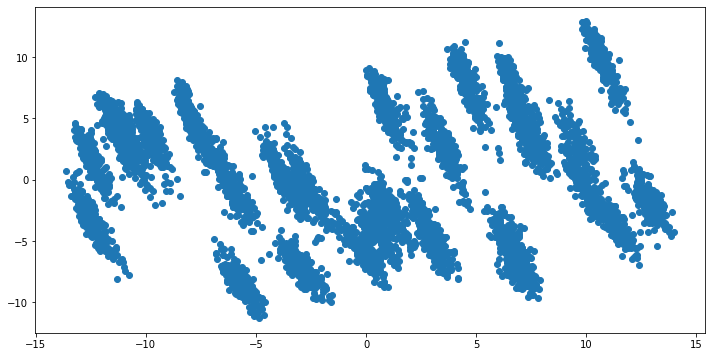

In [16]:
data_2d = pca_proj.fit_transform(data)
plt.scatter(data_2d[:,0],data_2d[:,1])

Nesse caso, o exemplo de dados se tratava de pessoas pronunciando letras do alfabeto. Podemos ver a distribuição dos dados na forma de clusters, onde temos alguns clusters mais próximos de outros, ou seja, apresentam maior similaridade entre as letras pronunciadas (ex: p, v e b, n e m)